# Libraries

In [162]:
import seaborn as sns 
from sklearn import svm, metrics
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder

# Dataset Characteristics

The dataset consists of the following ten features related to heart disease and associated risk factors:

- **sbp**: Systolic Blood Pressure (the pressure in your blood vessels when your heart beats)
- **tobacco**: Cumulative Tobacco (kg consumed over a lifetime)
- **ldl**: Low-Density Lipoprotein Cholesterol (often referred to as "bad" cholesterol)
- **Adiposity**: A measure of the condition of being severely overweight or obese, highlighting the accumulation of fat in the body. This can be assessed through various indicators such as Body Mass Index (BMI), waist circumference, waist-to-hip ratio, and body fat percentage.
- **famhist**: Family History of Heart Disease (`Present=1`, `Absent=0`)
- **typea**: Type-A Behavior (personality traits including competitiveness, urgency, aggressiveness, and impatience)
- **obesity**: A condition of excess body fat that increases the risk of health problems
- **alcohol**: Current Alcohol Consumption (measured in units appropriate to the dataset, e.g., grams per day)
- **age**: Age at Onset (the age at which the individual was diagnosed with the condition or began the behavior associated with the risk)
- **chd**: Coronary Heart Disease (`yes=1`, `no=0`)

This dataset aims to explore the relationships between these factors and the presence of coronary heart disease in individuals.


In [163]:
df = pd.read_csv("SAheart.csv", sep=",", decimal=".")
df.head()

sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age chd
0  160    12.00  5.73      23.11  Present     49    25.30    97.20   52  Si
1  144     0.01  4.41      28.61   Absent     55    28.87     2.06   63  Si
2  118     0.08  3.48      32.28  Present     52    29.14     3.81   46  No
3  170     7.50  6.41      38.03  Present     51    31.99    24.26   58  Si
4  134    13.60  3.50      27.78  Present     60    25.99    57.34   49  Si

In [164]:
df.shape

(462, 10)

We can see that we only have 462 observations, which is not that many and it is a common problem in medical datasets.

In [165]:
df.describe()

sbp     tobacco         ldl   adiposity       typea     obesity  \
count  462.000000  462.000000  462.000000  462.000000  462.000000  462.000000   
mean   138.326840    3.635649    4.740325   25.406732   53.103896   26.044113   
std     20.496317    4.593024    2.070909    7.780699    9.817534    4.213680   
min    101.000000    0.000000    0.980000    6.740000   13.000000   14.700000   
25%    124.000000    0.052500    3.282500   19.775000   47.000000   22.985000   
50%    134.000000    2.000000    4.340000   26.115000   53.000000   25.805000   
75%    148.000000    5.500000    5.790000   31.227500   60.000000   28.497500   
max    218.000000   31.200000   15.330000   42.490000   78.000000   46.580000   

          alcohol         age  
count  462.000000  462.000000  
mean    17.044394   42.816017  
std     24.481059   14.608956  
min      0.000000   15.000000  
25%      0.510000   31.000000  
50%      7.510000   45.000000  
75%     23.892500   55.000000  
max    147.190000   64.000000

In [166]:
df.isna().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [167]:
df['chd'].value_counts()

chd
No    302
Si    160
Name: count, dtype: int64

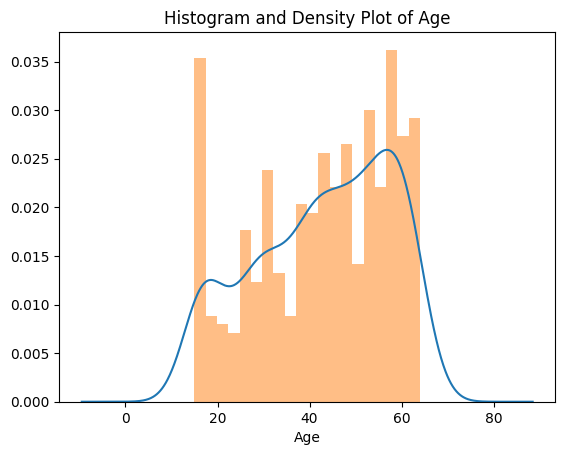

In [168]:
df['age'].plot(kind='density')
df['age'].plot(kind='hist', density=True, alpha=0.5, bins=20)
plt.title('Histogram and Density Plot of Age')
plt.xlabel('Age')
plt.ylabel("")
plt.show()

Generate Kernel Density Estimate plot using Gaussian kernels. We can do the same for all numerical features.

In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable. This function uses Gaussian kernels and includes automatic bandwidth determination. PDF of test and train should be the same.

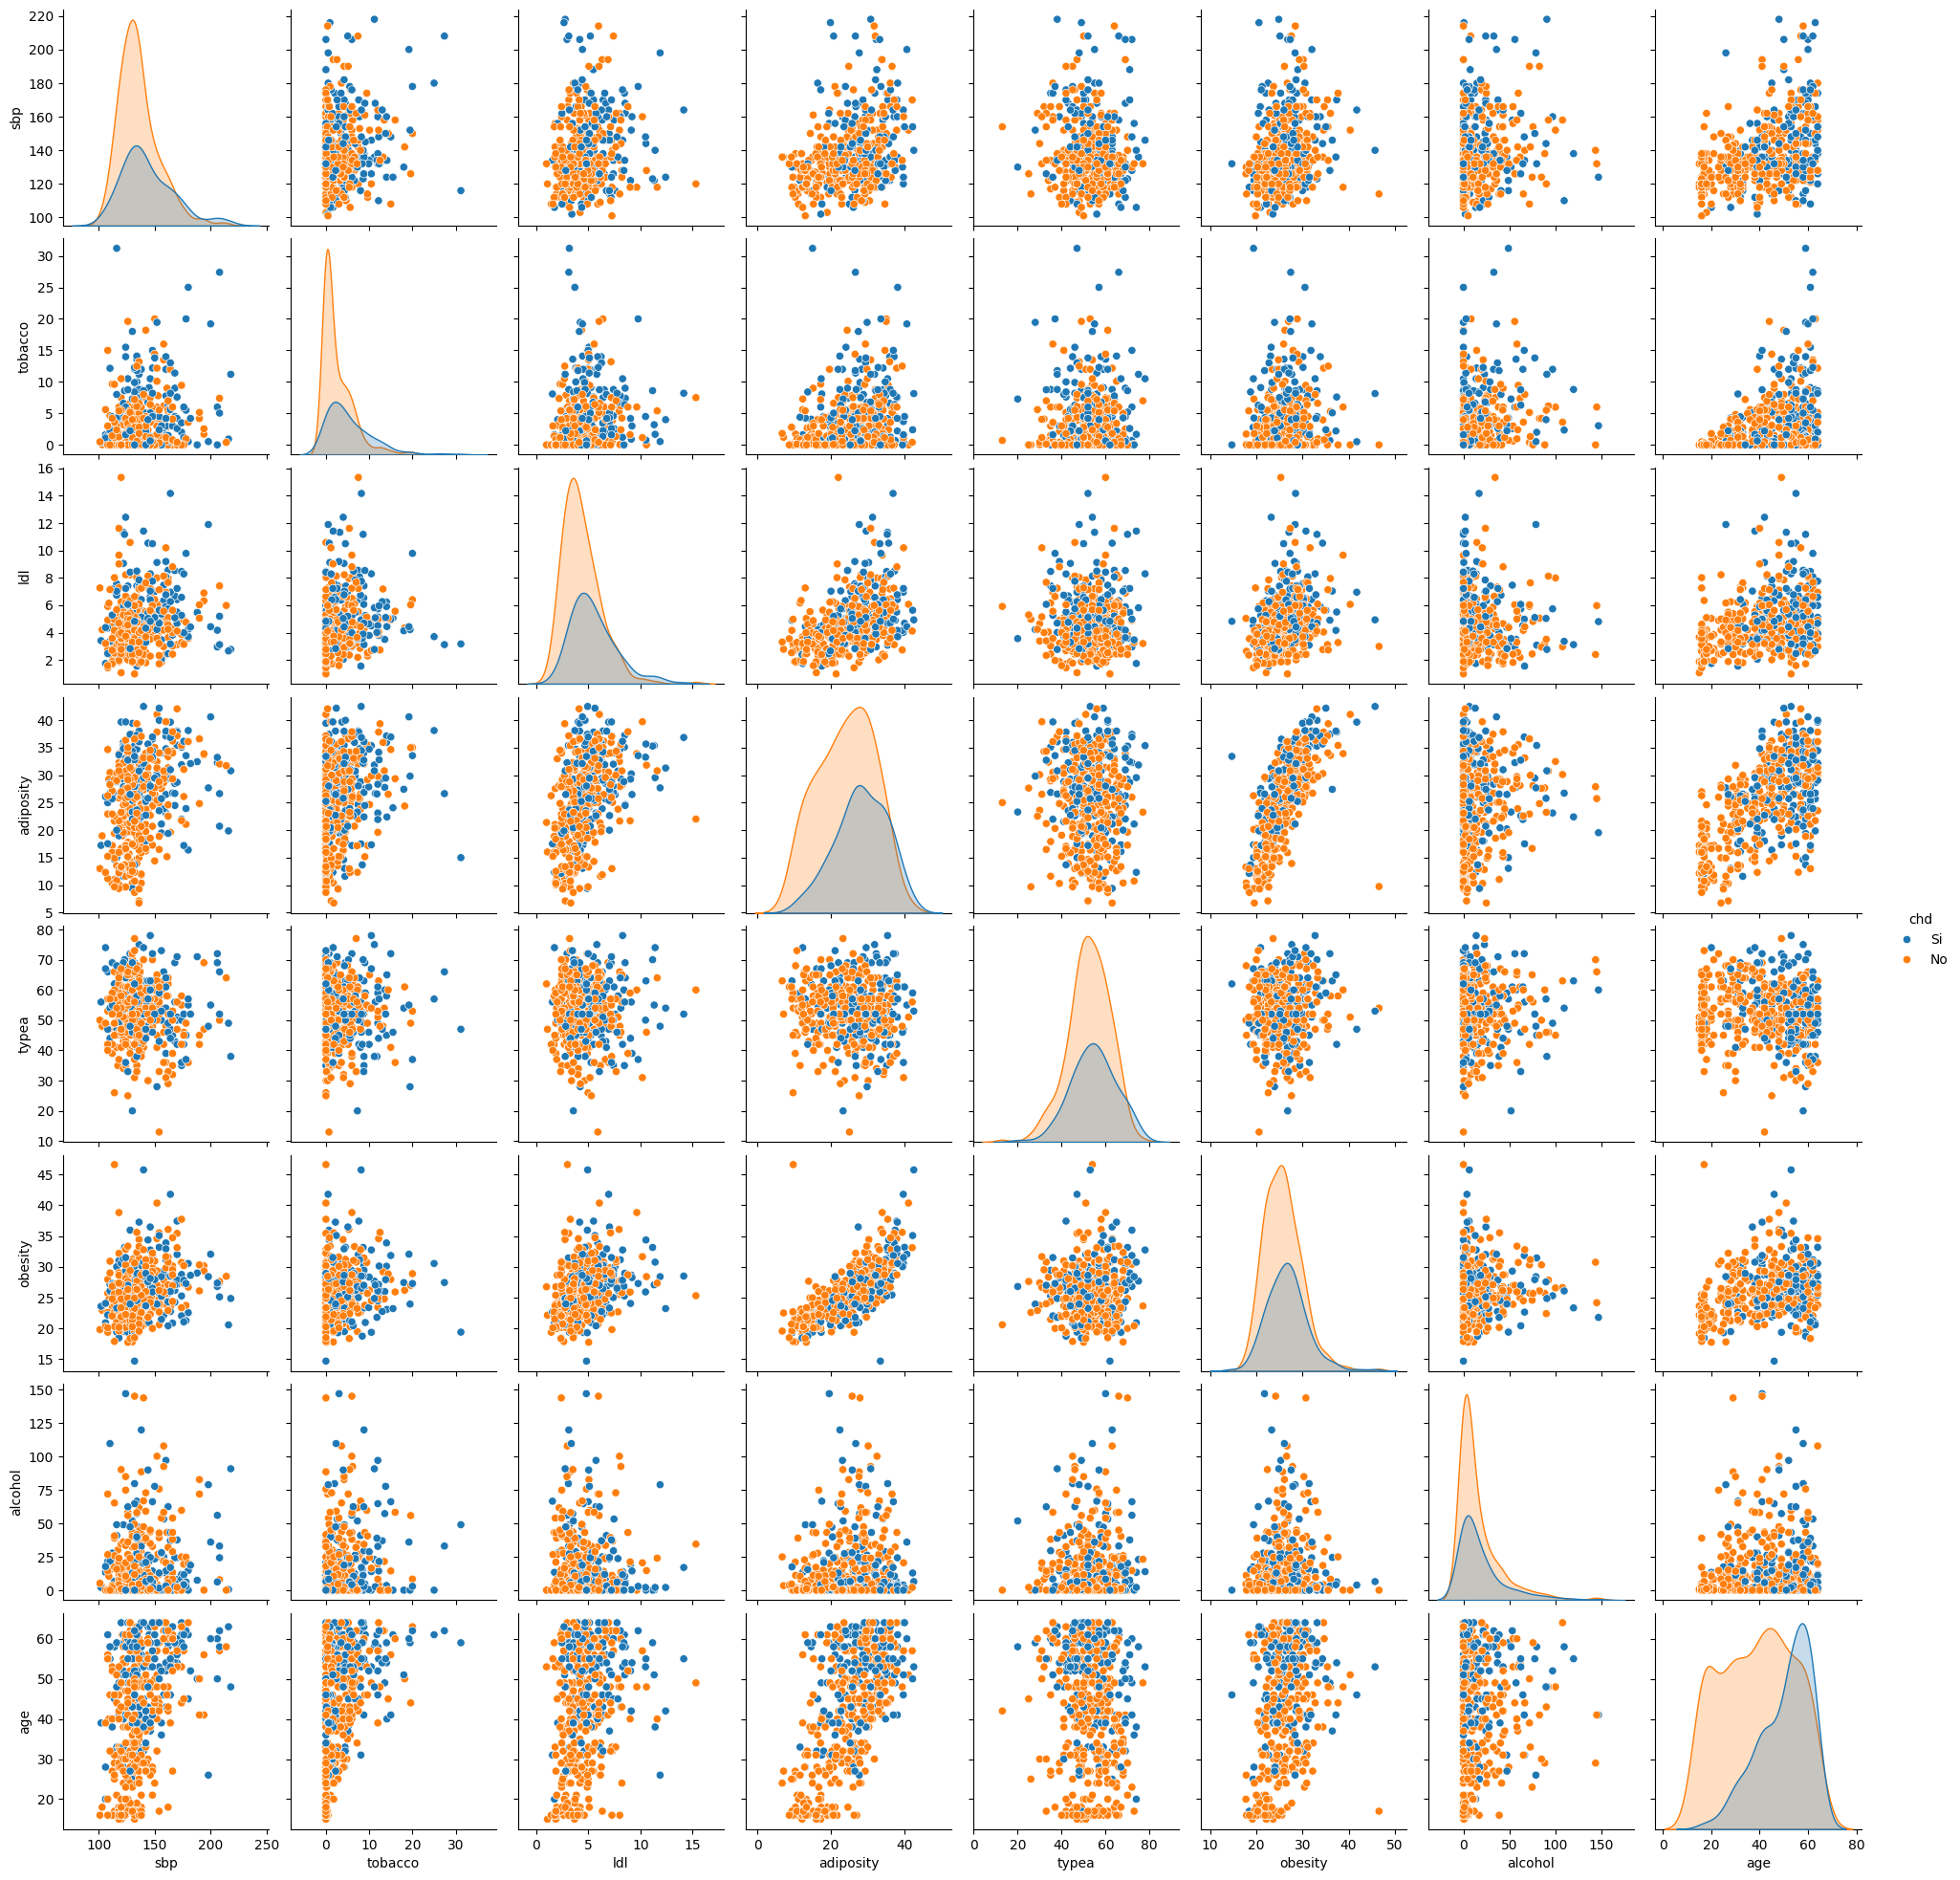

In [169]:
sns.pairplot(df, hue="chd", height=2.5)
plt.show()

<Axes: >

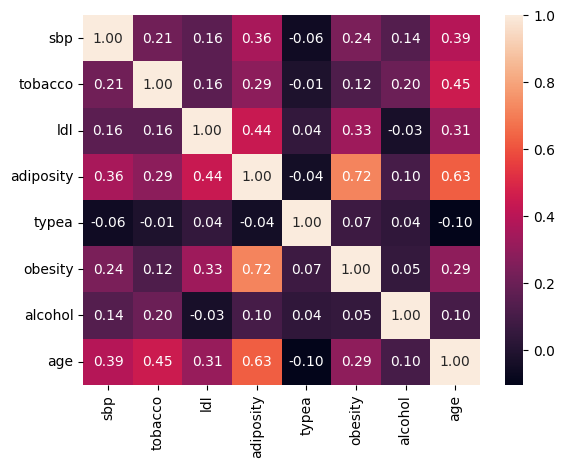

In [170]:
sns.heatmap(df[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity',
       'alcohol', 'age']].corr(), annot=True, fmt=".2f") # for numerical only

# Training

In [171]:
df

sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  age chd
0    160    12.00   5.73      23.11  Present     49    25.30    97.20   52  Si
1    144     0.01   4.41      28.61   Absent     55    28.87     2.06   63  Si
2    118     0.08   3.48      32.28  Present     52    29.14     3.81   46  No
3    170     7.50   6.41      38.03  Present     51    31.99    24.26   58  Si
4    134    13.60   3.50      27.78  Present     60    25.99    57.34   49  Si
..   ...      ...    ...        ...      ...    ...      ...      ...  ...  ..
457  214     0.40   5.98      31.72   Absent     64    28.45     0.00   58  No
458  182     4.20   4.41      32.10   Absent     52    28.61    18.72   52  Si
459  108     3.00   1.59      15.23   Absent     40    20.09    26.64   55  No
460  118     5.40  11.61      30.79   Absent     64    27.35    23.97   40  No
461  132     0.00   4.82      33.41  Present     62    14.70     0.00   46  Si

[462 rows x 10 columns]

In [172]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42, stratify=y)

encoder = OrdinalEncoder()
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()
X_train_encoded[['famhist']] = encoder.fit_transform(X_train[['famhist']])
X_test_encoded[['famhist']] = encoder.transform(X_test[['famhist']])

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

Fitting ....
Fitting 5 folds for each of 55 candidates, totalling 275 fits
Best kernel: poly
Best degree: 4
Best coef: 0.2
Predicting ....
Classification report for classifier GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'coef0': array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
                         'degree': [1, 2, 3, 4, 5], 'kernel': ['poly']},
             scoring='accuracy', verbose=1):
              precision    recall  f1-score   support

           0       0.67      0.77      0.72        61
           1       0.39      0.28      0.33        32

    accuracy                           0.60        93
   macro avg       0.53      0.53      0.52        93
weighted avg       0.58      0.60      0.58        93




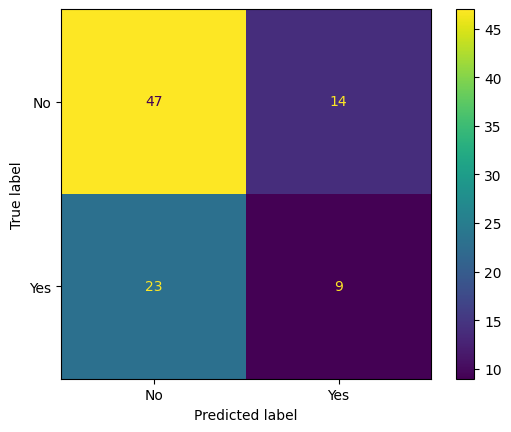

In [173]:
kernel = ['poly',]
degree = [1, 2, 3, 4, 5]
coef0=np.linspace(0, 2, 11)
# Create a classifier: a support vector classifier
clf = GridSearchCV(svm.SVC(), cv=5, param_grid={ "kernel": kernel, "degree": degree, "coef0": coef0}, 
                   verbose=1, n_jobs=-1, scoring="accuracy")

# Learn the train subset
print('Fitting ....')
clf.fit(X_train_scaled, y_train_encoded)

print('Best kernel: {:}'.format(clf.best_params_['kernel']))
print('Best degree: {:}'.format(clf.best_params_['degree']))
print('Best coef: {:}'.format(clf.best_params_['coef0']))



# Predict on the test subset
print('Predicting ....')
predicted = clf.predict(X_test_scaled)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test_encoded, predicted)}\n"
)

# Confusion matrix
cm = confusion_matrix(y_test_encoded, predicted, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No', 'Yes'])
disp.plot()
plt.show()

Fitting ....
Fitting 5 folds for each of 22 candidates, totalling 110 fits
Best kernel: poly
Best degree: 1
Best coef: -1.0
Predicting ....
Classification report for classifier GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'coef0': array([-1.  , -0.85, -0.7 , -0.55, -0.4 , -0.25, -0.1 ,  0.05,  0.2 ,
        0.35,  0.5 ]),
                         'degree': [0.5, 1], 'kernel': ['poly']},
             scoring='recall', verbose=1):
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        61
           1       0.63      0.69      0.66        32

    accuracy                           0.75        93
   macro avg       0.73      0.74      0.73        93
weighted avg       0.76      0.75      0.76        93




/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
55 fits failed out of a total of 110.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/site-packages/sklearn/utils/

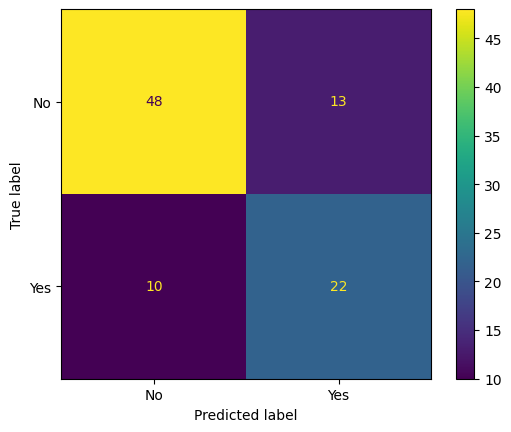

In [174]:
kernel = ['poly']
degree = [0.5, 1]
coef0=np.linspace(-1, 0.5, 11)
# gamma = [0.001, 0.01, 0.1]
# C = [1, 10, 100]
# Create a classifier: a support vector classifier
clf = GridSearchCV(svm.SVC(), cv=5, param_grid={ "kernel": kernel, "degree": degree, "coef0": coef0}, verbose=1, n_jobs=-1, scoring="recall")

# Learn the train subset
print('Fitting ....')
clf.fit(X_train_scaled, y_train_encoded)

print('Best kernel: {:}'.format(clf.best_params_['kernel']))
print('Best degree: {:}'.format(clf.best_params_['degree']))
print('Best coef: {:}'.format(clf.best_params_['coef0']))



# Predict on the test subset
print('Predicting ....')
predicted = clf.predict(X_test_scaled)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test_encoded, predicted)}\n"
)

# Confusion matrix
cm = confusion_matrix(y_test_encoded, predicted, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No', 'Yes'])
disp.plot()
plt.show()

Fitting ....
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best kernel: rbf
Best degree: 0.1
Best coef: 100
Predicting ....
Classification report for classifier GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.01, 0.1],
                         'kernel': ['rbf']},
             scoring='recall', verbose=1):
              precision    recall  f1-score   support

           0       0.71      0.67      0.69        61
           1       0.43      0.47      0.45        32

    accuracy                           0.60        93
   macro avg       0.57      0.57      0.57        93
weighted avg       0.61      0.60      0.61        93




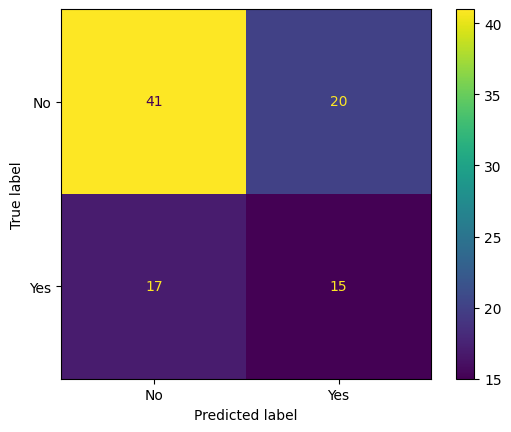

In [175]:
kernel = ['rbf']
# degree = [1, 2, 3, 4]
# coef0=np.linspace(0, 1, 11)
gamma = [0.001, 0.01, 0.1]
C = [1, 10, 100]
# Create a classifier: a support vector classifier
clf = GridSearchCV(svm.SVC(), cv=5, param_grid={ "kernel": kernel, "gamma": gamma, "C": C}, verbose=1, n_jobs=-1, scoring="recall")

# Learn the train subset
print('Fitting ....')
clf.fit(X_train_scaled, y_train_encoded)

print('Best kernel: {:}'.format(clf.best_params_['kernel']))
print('Best degree: {:}'.format(clf.best_params_['gamma']))
print('Best coef: {:}'.format(clf.best_params_['C']))



# Predict on the test subset
print('Predicting ....')
predicted = clf.predict(X_test_scaled)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test_encoded, predicted)}\n"
)

# Confusion matrix
cm = confusion_matrix(y_test_encoded, predicted, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No', 'Yes'])
disp.plot()
plt.show()

# Training without adiposity

In [176]:
new_df = df.drop(columns=['adiposity'])

In [177]:
X = new_df.iloc[:, :-1]
y = new_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42, stratify=y)

encoder = OrdinalEncoder()
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()
X_train_encoded[['famhist']] = encoder.fit_transform(X_train[['famhist']])
X_test_encoded[['famhist']] = encoder.transform(X_test[['famhist']])

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

Fitting ....
Fitting 5 folds for each of 55 candidates, totalling 275 fits
Best kernel: poly
Best degree: 1
Best coef: 0.0
Predicting ....
Classification report for classifier GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'coef0': array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
                         'degree': [1, 2, 3, 4, 5], 'kernel': ['poly']},
             scoring='recall', verbose=1):
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        61
           1       0.63      0.69      0.66        32

    accuracy                           0.75        93
   macro avg       0.73      0.74      0.73        93
weighted avg       0.76      0.75      0.76        93


48 13 10 22


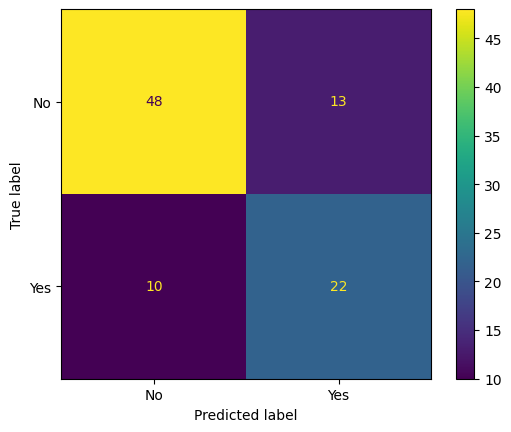

In [178]:
kernel = ['poly',]
degree = [1, 2, 3, 4, 5]
coef0=np.linspace(0, 2, 11)
# Create a classifier: a support vector classifier
clf = GridSearchCV(svm.SVC(), cv=5, param_grid={ "kernel": kernel, "degree": degree, "coef0": coef0}, 
                   verbose=1, n_jobs=-1, scoring="recall")

# Learn the train subset
print('Fitting ....')
clf.fit(X_train_scaled, y_train_encoded)

print('Best kernel: {:}'.format(clf.best_params_['kernel']))
print('Best degree: {:}'.format(clf.best_params_['degree']))
print('Best coef: {:}'.format(clf.best_params_['coef0']))



# Predict on the test subset
print('Predicting ....')
predicted = clf.predict(X_test_scaled)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test_encoded, predicted)}\n"
)

# Confusion matrix
cm = confusion_matrix(y_test_encoded, predicted, labels=clf.classes_)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No', 'Yes'])
disp.plot()
plt.show()

Fitting ....
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best kernel: rbf
Best degree: 0.001
Best coef: 100
Predicting ....
Classification report for classifier GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.01, 0.1],
                         'kernel': ['rbf']},
             scoring='recall', verbose=1):
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        61
           1       0.61      0.62      0.62        32

    accuracy                           0.73        93
   macro avg       0.70      0.71      0.70        93
weighted avg       0.73      0.73      0.73        93




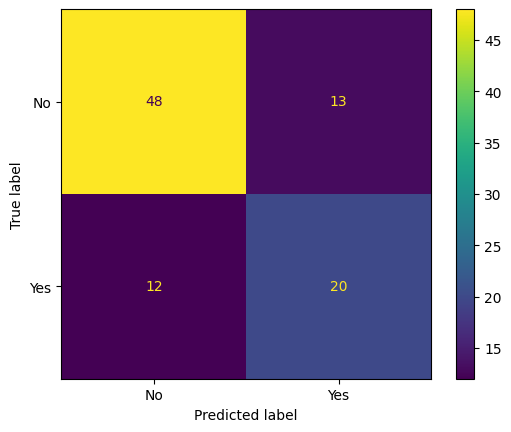

In [179]:
kernel = ['rbf']
gamma = [0.001, 0.01, 0.1]
C = [1, 10, 100]
# Create a classifier: a support vector classifier
clf = GridSearchCV(svm.SVC(), cv=5, param_grid={ "kernel": kernel, "gamma": gamma, "C": C}, verbose=1, n_jobs=-1, scoring="recall")

# Learn the train subset
print('Fitting ....')
clf.fit(X_train_scaled, y_train_encoded)

print('Best kernel: {:}'.format(clf.best_params_['kernel']))
print('Best degree: {:}'.format(clf.best_params_['gamma']))
print('Best coef: {:}'.format(clf.best_params_['C']))



# Predict on the test subset
print('Predicting ....')
predicted = clf.predict(X_test_scaled)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test_encoded, predicted)}\n"
)

# Confusion matrix
cm = confusion_matrix(y_test_encoded, predicted, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No', 'Yes'])
disp.plot()
plt.show()

# Weighted

weighted form

pca

test train size

metrics

https://scikit-learn.org/stable/modules/svm.html#unbalanced-problems

In [180]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42, stratify=y)

encoder = OrdinalEncoder()
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()
X_train_encoded[['famhist']] = encoder.fit_transform(X_train[['famhist']])
X_test_encoded[['famhist']] = encoder.transform(X_test[['famhist']])

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

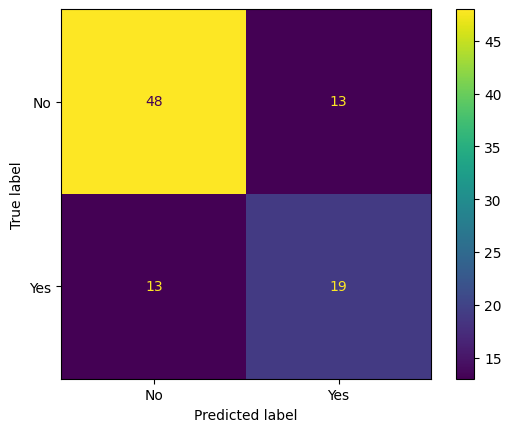

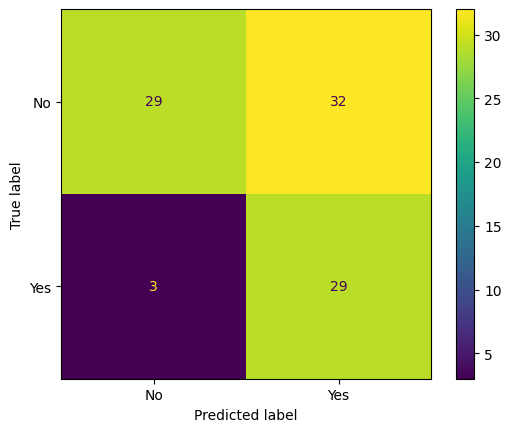

In [181]:
# fit the model and get the separating hyperplane
clf = svm.SVC(kernel="linear", C=1.0)
clf.fit(X_train_scaled, y_train_encoded)
predicted = clf.predict(X_test_scaled)

cm = confusion_matrix(y_test_encoded, predicted, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot()
plt.show()

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel="linear", class_weight={1: 3})
wclf.fit(X_train_scaled, y_train_encoded)
wpredicted = wclf.predict(X_test_scaled)

cm = confusion_matrix(y_test_encoded, wpredicted, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot()
plt.show()

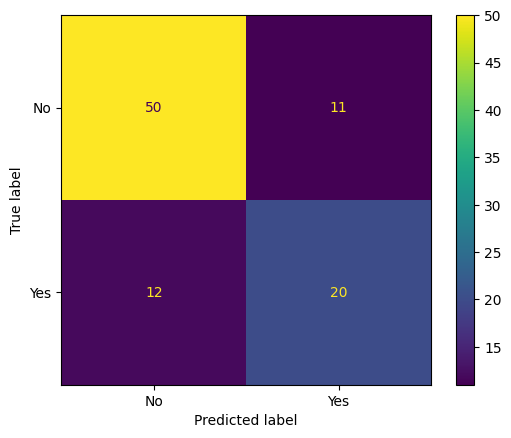

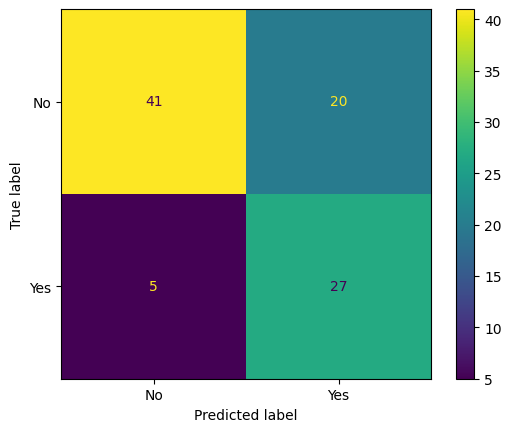

In [182]:
# fit the model and get the separating hyperplane
clf = svm.SVC(kernel="rbf", C=10, gamma=0.001)
clf.fit(X_train_scaled, y_train_encoded)
predicted = clf.predict(X_test_scaled)

cm = confusion_matrix(y_test_encoded, predicted, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot()
plt.show()

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel="rbf", class_weight={0:3, 1: 5}, gamma=0.01)
wclf.fit(X_train_scaled, y_train_encoded)
wpredicted = wclf.predict(X_test_scaled)

cm = confusion_matrix(y_test_encoded, wpredicted, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot()
plt.show()

# PCA

In [183]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42, stratify=y)

encoder = OrdinalEncoder()
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()
X_train_encoded[['famhist']] = encoder.fit_transform(X_train[['famhist']])
X_test_encoded[['famhist']] = encoder.transform(X_test[['famhist']])

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

Fitting...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:
 {'pca__n_components': 5, 'svm__C': 100, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}
Predicting...
Classification report for classifier GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [2, 5, 10],
                         'svm__C': [1, 10, 100],
                         'svm__gamma': [0.001, 0.01, 0.1],
                         'svm__kernel': ['rbf']},
             scoring=make_scorer(recall_score, response_method='predict', pos_label=Si),
             verbose=1):
              precision    recall  f1-score   support

          No       0.81      0.77      0.79        61
          Si       0.60      0.66      0.63        32

    accuracy                           0.73        93
   macro avg       0.71      0.71   

/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/site-packages/sklearn/pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)


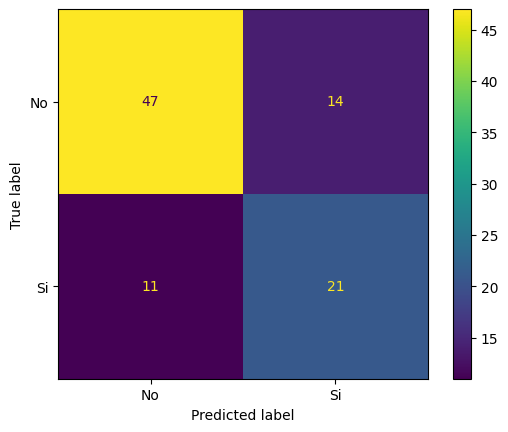

In [184]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import make_scorer, recall_score

# Define a custom recall scorer that specifies the positive label
# Assuming 'Si' is your positive class label as previously discussed
recall_scorer = make_scorer(recall_score, pos_label='Si')

# Create a pipeline that first applies PCA and then fits an SVM classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize data
    ('pca', PCA()),                # Apply PCA
    ('svm', svm.SVC())             # Classifier
])

# Parameter grid for GridSearchCV
# Note: When using a pipeline, prefix parameters by the step name
param_grid = {
    'pca__n_components': [2, 5, 10],  # Number of components to keep
    'svm__kernel': ['rbf'],
    'svm__gamma': [0.001, 0.01, 0.1],
    'svm__C': [1, 10, 100]
}

# Create the GridSearchCV object
clf = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1, scoring=recall_scorer)

# Assuming X_train_scaled, y_train have been defined and prepared
print('Fitting...')
clf.fit(X_train_scaled, y_train)

print('Best parameters found:\n', clf.best_params_)

# Predict on the test set
# Assuming X_test_scaled, y_test have been defined and prepared
print('Predicting...')
predicted = clf.predict(X_test_scaled)

# Evaluation
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

# Confusion Matrix
cm = confusion_matrix(y_test, predicted, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Si'])
disp.plot()
plt.show()


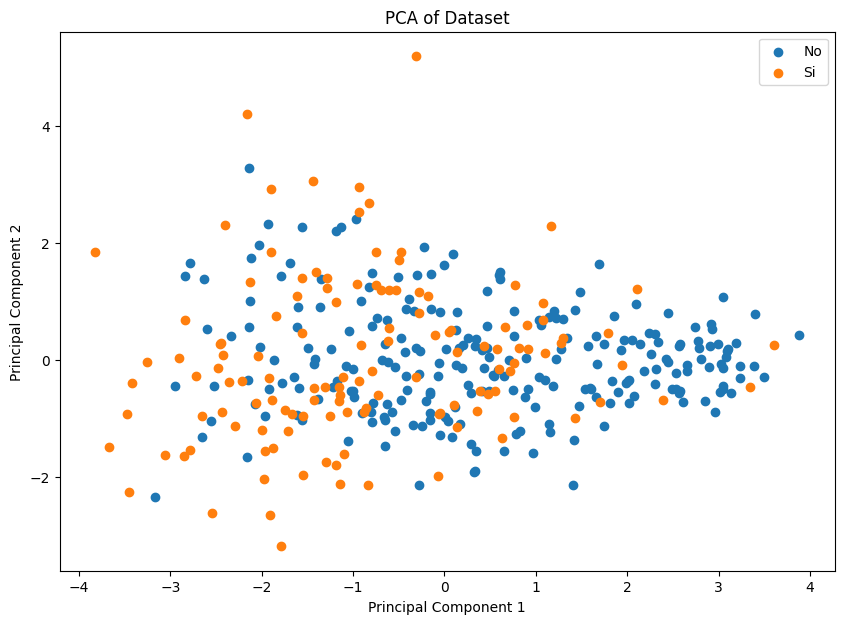

In [185]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train_scaled is your scaled training data

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA on the scaled training data and transform the data
X_pca = pca.fit_transform(X_train_scaled)

# Assuming y_train contains your target variable and is appropriately encoded
# For visualization, convert 'y_train' to numpy array if it isn't already
y_train_array = np.array(y_train)

# Plot the first two principal components
plt.figure(figsize=(10, 7))

# For each class, plot the points
for label in np.unique(y_train_array):
    plt.scatter(X_pca[y_train_array == label, 0], X_pca[y_train_array == label, 1], label=label)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.legend()
plt.show()


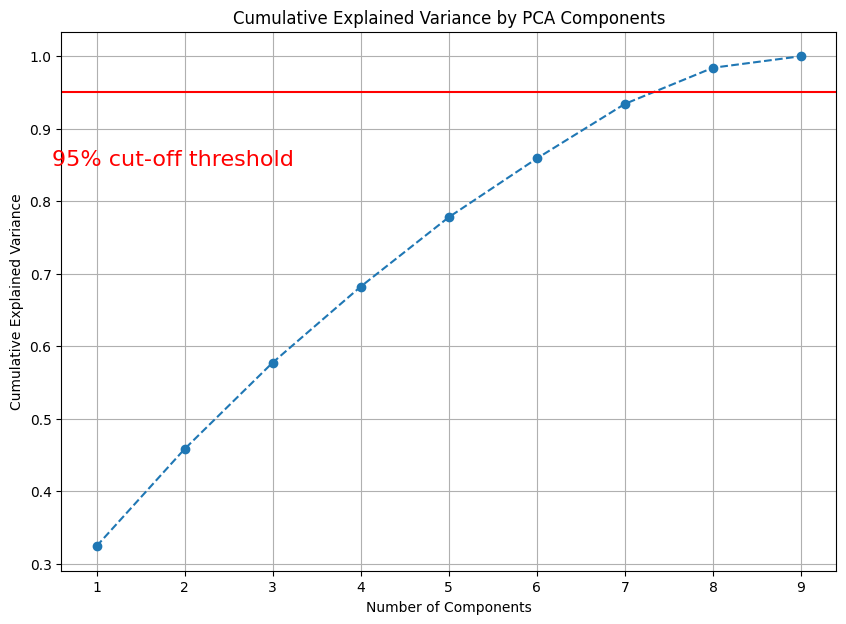

In [186]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X_train_scaled is your scaled training data

# Initialize PCA without specifying n_components to keep all components
pca = PCA()

# Fit PCA on the scaled training data
pca.fit(X_train_scaled)

# Calculate the cumulative variance explained by the principal components
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative variance
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)

# Optional: Add a horizontal line to mark a specific variance threshold, e.g., 0.95
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

plt.show()


In [187]:
pca.components_

array([[-3.15987659e-01, -2.72150585e-01, -3.30311950e-01,
        -5.19651551e-01, -1.91407217e-01, -1.25875570e-03,
        -4.27252040e-01, -1.60484862e-01, -4.49448702e-01],
       [ 1.69626962e-01,  4.94140522e-01, -3.36107605e-01,
        -1.54224875e-01, -1.30940179e-01, -4.02316653e-01,
        -3.43415254e-01,  4.98295121e-01,  2.12278403e-01],
       [-1.21426961e-01,  1.52577616e-01, -6.10318933e-02,
        -1.60085361e-01,  4.54966877e-01,  7.04694744e-01,
        -7.28288380e-02,  4.67705685e-01, -7.05773353e-02],
       [ 4.00547110e-01, -2.48387054e-01, -1.96815078e-01,
         9.11447245e-02, -6.18871345e-01,  2.89260251e-01,
         2.80515955e-01,  3.66204830e-01, -2.26614068e-01],
       [-4.54082071e-01,  5.62047078e-01,  2.23308648e-01,
         5.16259428e-02, -5.54581762e-01,  3.00030037e-01,
         6.92032455e-05, -1.59841732e-01,  4.74576328e-02],
       [ 5.95315444e-01,  1.30788128e-01, -9.90444155e-02,
        -1.71442167e-01, -3.61084482e-02,  3.789966

In [188]:
pca.explained_variance_ratio_

array([0.32429072, 0.13402645, 0.11915554, 0.10480126, 0.09569954,
       0.08104737, 0.07526703, 0.04981015, 0.01590194])